# Polynomial Regression

In linear regression problem, saw two variables in your data set were correlated but the relationship doesn’t look much linear. So hence depending on what the data looks like,Here we can do a polynomial regression on the data to fit a polynomial equation to it. In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x


Here i am using insurence data from a company. **file name: 10_insurancedata.xlsx**

Data set is explored in the descriptive stastistics section.

In [0]:
from google.colab import files #uploading the file to colab directory.
uploaded = files.upload()

Saving 10_insurancedata.xlsx to 10_insurancedata.xlsx


In [0]:
import io                 # importing io library for reading uploaded file.
import pandas as pd       # importing pandas for dataframe creation and descriptive statistics.
lr1 = pd.read_excel(io.BytesIO(uploaded['10_insurancedata.xlsx']))  # read the uploaded file as pandas dataframe.

using pandas and io libraries, the uploaded dataset will copyed to the dataframe lr1.

In [0]:
print(lr1.shape)          # give number of columns and rows in the dataset.

(620, 5)


In [0]:
print(lr1.describe())     # provide detailed tabular descriptive statistics of the data,
                          # which include - mean, standard deviation, max,min, count and percentile data.

         district     percapgdp  avgcancerspend
count  620.000000    620.000000      620.000000
mean   310.500000  45030.381745   378023.611985
std    179.122863  10363.028564   136983.995348
min      1.000000  19154.741670   119999.545400
25%    155.750000  37054.194693   263714.761025
50%    310.500000  47180.536255   393918.785100
75%    465.250000  52953.185985   490550.758725
max    620.000000  68366.672160   644532.690500


In [0]:
print(lr1.head())  #List first five rows of the dataframe

   district region  spendtype    percapgdp  avgcancerspend
0         1  North  Insurance  54822.32372     354097.0520
1         2  North  Insurance  44447.65969     423805.8963
2         3  North  Insurance  47444.91232     339665.6173
3         4  North  Insurance  40322.25256     384887.2437
4         5  North  Insurance  49366.17764     362895.3526


In [0]:
print(lr1.dtypes)  #return columns names with data types

district            int64
region             object
spendtype          object
percapgdp         float64
avgcancerspend    float64
dtype: object


Detailed descriptive statistics is provided above. The data set is conssists of 620 rows and 5 features. To plot the regression we are using the columns "percapgdp" and "avgcancerspend". Both selected features are of float datatype.

In [0]:
import numpy as np
x=lr1[['percapgdp']].to_numpy()               # coverting the dataframe column to numpy array.
y=lr1[['avgcancerspend']].to_numpy()          #coverting the dataframe column to numpy array.
p4 = np.poly1d(np.polyfit(x[:,0], y[:,0], 4)) # construct an 4th-degree polynomial model of our data that minimizes squared error. 
                                              # polyfit is a numpy fuction using to construct the polinomian regression.

In [0]:
p4          #pring slope, intercept, r_value, p_value, std_err respectively.

poly1d([ 4.73492468e-13, -9.48749151e-08,  6.74898578e-03, -1.90319975e+02,
        1.99391535e+06])

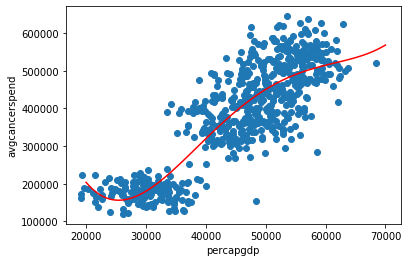

In [0]:
import matplotlib.pyplot as plt

xp = np.linspace(20000, 70000,100)      #setting x-axis and y-axisploting values for the plot.
plt.scatter(x, y) 
plt.plot(xp, p4(xp), c='r')             #ploting the scatter plot with fitted polinomial line.
plt.xlabel('percapgdp')
plt.ylabel('avgcancerspend')
plt.show()

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial.

In [0]:
from sklearn.metrics import r2_score      # importing r2_score from sklearn.metrics
r2 = r2_score(y, p4(x))                   # calcutating the r-squared value.
print(r2)

0.7453887010087342


After ploting the polinomial regression our r-squred value is increased from the 0.71 (value of linear regression) to 0.74. So the prediction efficieny of the model is improved, but a little only. This may be because of the outliars in the data.